# Project – Analyzing the trends of COVID-19 with Python

#### Problem Statement:
Given data about COVID 19 patients, write code to visualize the impact and analyze the trend
of rate of infection and recovery as well as make predictions about the number of cases
expected a week in future based on the current trends.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("covid_19.csv", skipinitialspace = True)
df.head()

Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa

In [3]:
df.rename(columns = {"Province/State":"State", "Country/Region":"Country"}, inplace = True)

In [4]:
df.head()

State      Country       Lat       Long        Date  Confirmed  Deaths  \
0   NaN  Afghanistan  33.93911  67.709953  2020-01-22          0       0   
1   NaN      Albania  41.15330  20.168300  2020-01-22          0       0   
2   NaN      Algeria  28.03390   1.659600  2020-01-22          0       0   
3   NaN      Andorra  42.50630   1.521800  2020-01-22          0       0   
4   NaN       Angola -11.20270  17.873900  2020-01-22          0       0   

   Recovered  Active             WHO Region  
0          0       0  Eastern Mediterranean  
1          0       0                 Europe  
2          0       0                 Africa  
3          0       0                 Europe  
4          0       0                 Africa

In [5]:
df.tail()

State                Country        Lat       Long        Date  \
49063   NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064   NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065   NaN                Comoros -11.645500  43.333300  2020-07-27   
49066   NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067   NaN                Lesotho -29.610000  28.233600  2020-07-27   

       Confirmed  Deaths  Recovered  Active             WHO Region  
49063        865      14        734     117                 Africa  
49064       1691     483        833     375  Eastern Mediterranean  
49065        354       7        328      19                 Africa  
49066       7235      60       6028    1147                 Europe  
49067        505      12        128     365                 Africa

In [6]:
df.shape

(49068, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State       14664 non-null  object 
 1   Country     49068 non-null  object 
 2   Lat         49068 non-null  float64
 3   Long        49068 non-null  float64
 4   Date        49068 non-null  object 
 5   Confirmed   49068 non-null  int64  
 6   Deaths      49068 non-null  int64  
 7   Recovered   49068 non-null  int64  
 8   Active      49068 non-null  int64  
 9   WHO Region  49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   State       14664 non-null  object        
 1   Country     49068 non-null  object        
 2   Lat         49068 non-null  float64       
 3   Long        49068 non-null  float64       
 4   Date        49068 non-null  datetime64[ns]
 5   Confirmed   49068 non-null  int64         
 6   Deaths      49068 non-null  int64         
 7   Recovered   49068 non-null  int64         
 8   Active      49068 non-null  int64         
 9   WHO Region  49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [10]:
df.describe()

Lat          Long     Confirmed         Deaths     Recovered  \
count  49068.000000  49068.000000  4.906800e+04   49068.000000  4.906800e+04   
mean      21.433730     23.528236  1.688490e+04     884.179160  7.915713e+03   
std       24.950320     70.442740  1.273002e+05    6313.584411  5.480092e+04   
min      -51.796300   -135.000000  0.000000e+00       0.000000  0.000000e+00   
25%        7.873054    -15.310100  4.000000e+00       0.000000  0.000000e+00   
50%       23.634500     21.745300  1.680000e+02       2.000000  2.900000e+01   
75%       41.204380     80.771797  1.518250e+03      30.000000  6.660000e+02   
max       71.706900    178.065000  4.290259e+06  148011.000000  1.846641e+06   

             Active  
count  4.906800e+04  
mean   8.085012e+03  
std    7.625890e+04  
min   -1.400000e+01  
25%    0.000000e+00  
50%    2.600000e+01  
75%    6.060000e+02  
max    2.816444e+06

#### As the data containscount of cases on daily basis, hence finding the latest date in the dataset.

In [11]:
# Latest date in dataset
latest = df[df['Date'] == df['Date'].max()]
latest.head()

State      Country       Lat       Long       Date  Confirmed  Deaths  \
48807   NaN  Afghanistan  33.93911  67.709953 2020-07-27      36263    1269   
48808   NaN      Albania  41.15330  20.168300 2020-07-27       4880     144   
48809   NaN      Algeria  28.03390   1.659600 2020-07-27      27973    1163   
48810   NaN      Andorra  42.50630   1.521800 2020-07-27        907      52   
48811   NaN       Angola -11.20270  17.873900 2020-07-27        950      41   

       Recovered  Active             WHO Region  
48807      25198    9796  Eastern Mediterranean  
48808       2745    1991                 Europe  
48809      18837    7973                 Africa  
48810        803      52                 Europe  
48811        242     667                 Africa

In [12]:
latest.shape

(261, 10)

In [13]:
df['Active'] = df['Confirmed'] - df['Deaths'] - df['Recovered']

In [14]:
df.tail(10)

State                Country        Lat  \
49058                          NaN                 Malawi -13.254300   
49059  Falkland Islands (Malvinas)         United Kingdom -51.796300   
49060    Saint Pierre and Miquelon                 France  46.885200   
49061                          NaN            South Sudan   6.877000   
49062                          NaN         Western Sahara  24.215500   
49063                          NaN  Sao Tome and Principe   0.186400   
49064                          NaN                  Yemen  15.552727   
49065                          NaN                Comoros -11.645500   
49066                          NaN             Tajikistan  38.861000   
49067                          NaN                Lesotho -29.610000   

            Long       Date  Confirmed  Deaths  Recovered  Active  \
49058  34.301500 2020-07-27       3664      99       1645    1920   
49059 -59.523600 2020-07-27         13       0         13       0   
49060 -56.315900 2020-07-27          4       0          1       3   
49061  31.307000 2020-07-27       2305      46       1175    1084   
49062 -12.885800 2020-07-27         10       1          8       1   
49063   6.613100 2020-07-27        865      14        734     117   
49064  48.516388 2020-07-27       1691     483        833     375   
49065  43.333300 2020-07-27        354       7        328      19   
49066  71.276100 2020-07-27       7235      60       6028    1147   
49067  28.233600 2020-07-27        505      12        128     365   

                  WHO Region  
49058                 Africa  
49059                 Europe  
49060                 Europe  
49061                 Africa  
49062                 Africa  
49063                 Africa  
49064  Eastern Mediterranean  
49065                 Africa  
49066                 Europe  
49067                 Africa

#### Performing Analysis on the data which is filtered by the data present for the latest date in the dataset.

In [15]:
w = latest.groupby('Country')['Confirmed', 'Active' ,'Deaths'].sum().reset_index()
w

Country  Confirmed  Active  Deaths
0           Afghanistan      36263    9796    1269
1               Albania       4880    1991     144
2               Algeria      27973    7973    1163
3               Andorra        907      52      52
4                Angola        950     667      41
..                  ...        ...     ...     ...
182  West Bank and Gaza      10621    6791      78
183      Western Sahara         10       1       1
184               Yemen       1691     375     483
185              Zambia       4552    1597     140
186            Zimbabwe       2704    2126      36

[187 rows x 4 columns]

In [16]:
import plotly
import plotly.express as px
fig = px.choropleth(w, locations = 'Country', locationmode = 'country names', color= 'Active', hover_name = 'Country',
                    range_color=[1,1500], color_continuous_scale="Peach", title='Active cases Countries')
fig.show()

In [17]:
fig2 = px.choropleth(w, locations='Country', locationmode='country names', color='Deaths', hover_name='Country',
                     range_color = [1,50000], color_continuous_scale='Viridis', title='Deaths per Country')
fig2.show()

In [18]:
fig3 = px.choropleth(w, locations='Country', locationmode='country names', color='Confirmed', hover_name='Country',
                     range_color = [1,500000], color_continuous_scale='Viridis', title='Confirmed cases per Country')
fig3.show()

In [19]:
confirmed_by_dates = df.groupby('Date')['Date', 'Confirmed'].sum().reset_index()
confirmed_by_dates.head(20)

Date  Confirmed
0  2020-01-22        555
1  2020-01-23        654
2  2020-01-24        941
3  2020-01-25       1434
4  2020-01-26       2118
5  2020-01-27       2927
6  2020-01-28       5578
7  2020-01-29       6166
8  2020-01-30       8234
9  2020-01-31       9927
10 2020-02-01      12038
11 2020-02-02      16787
12 2020-02-03      19887
13 2020-02-04      23898
14 2020-02-05      27643
15 2020-02-06      30802
16 2020-02-07      34334
17 2020-02-08      37068
18 2020-02-09      40095
19 2020-02-10      42633

In [20]:
confirmed_by_dates.shape

(188, 2)

In [21]:
confirmed_by_dates.tail(5)

Date  Confirmed
183 2020-07-23   15510481
184 2020-07-24   15791645
185 2020-07-25   16047190
186 2020-07-26   16251796
187 2020-07-27   16480485

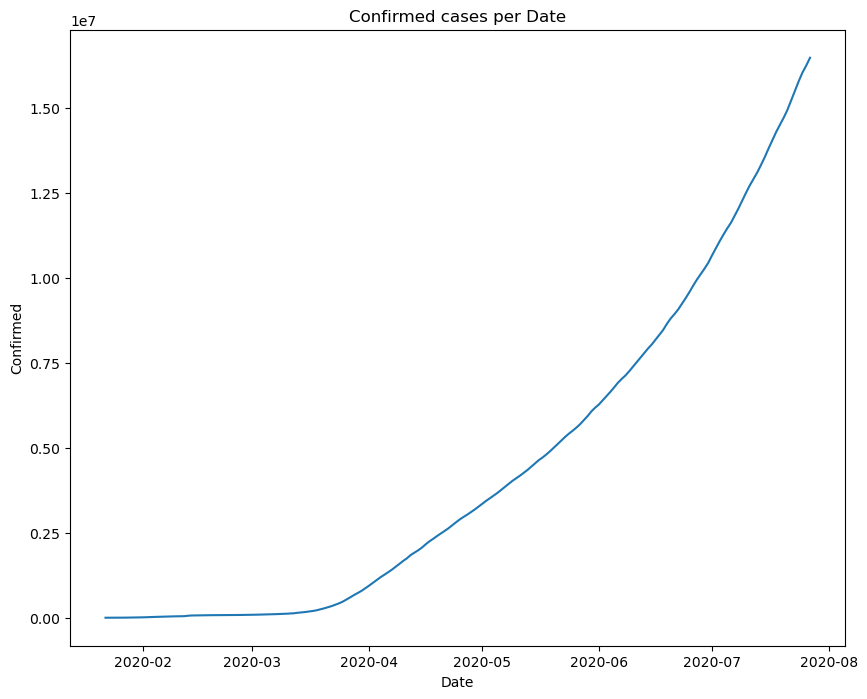

In [22]:
plt.figure(figsize = (10,8))
sns.lineplot(x = 'Date', y = 'Confirmed', data = confirmed_by_dates)
plt.title("Confirmed cases per Date")
plt.savefig("Confirmed_per_dated.png")
plt.show()

In [23]:
active_by_dates = df.groupby('Date')['Date', 'Active'].sum().reset_index()
active_by_dates.head(10)

Date  Active
0 2020-01-22     510
1 2020-01-23     606
2 2020-01-24     879
3 2020-01-25    1353
4 2020-01-26    2010
5 2020-01-27    2784
6 2020-01-28    5340
7 2020-01-29    5908
8 2020-01-30    7922
9 2020-01-31    9495

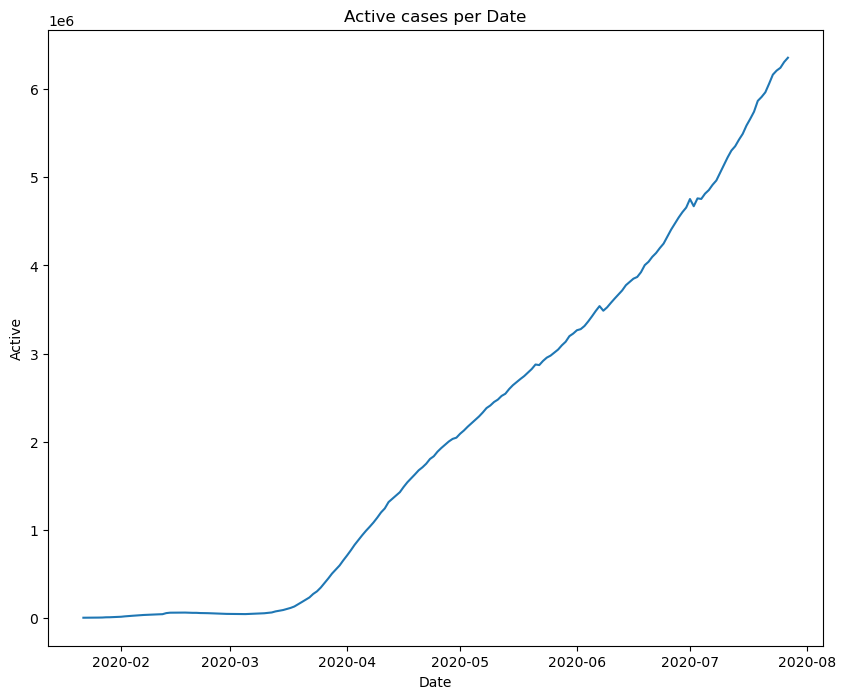

In [24]:
plt.figure(figsize = (10,8))
sns.lineplot(x = 'Date', y = 'Active', data = active_by_dates)
plt.title("Active cases per Date")
plt.savefig("Active_per_dated.png")
plt.show()

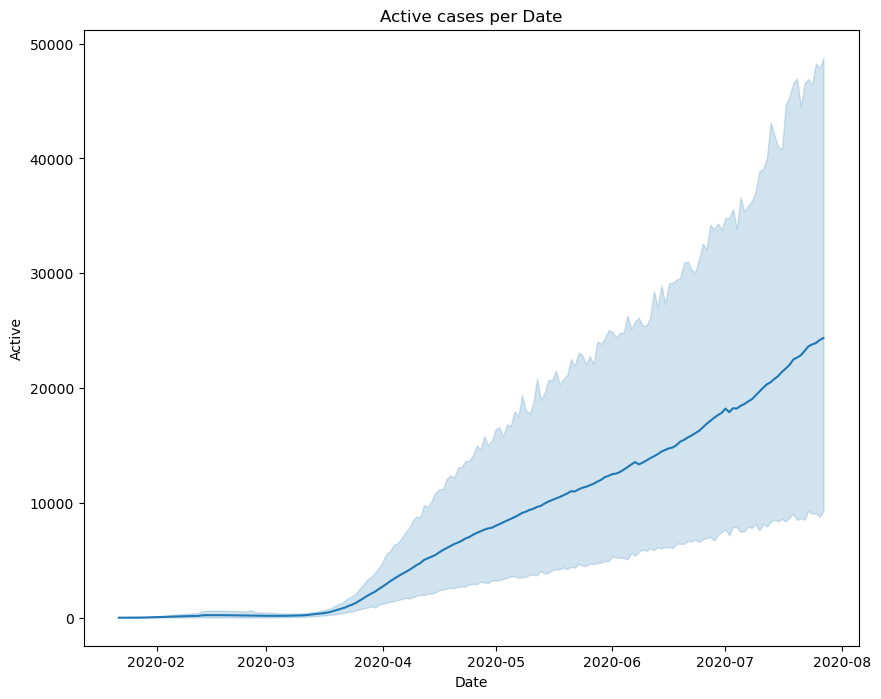

In [25]:
plt.figure(figsize = (10,8))
sns.lineplot(x = 'Date', y = 'Active', data = df)
plt.title("Active cases per Date")
plt.show()

In [26]:
actives = latest.groupby('Country')['Active'].sum().sort_values(ascending = False).head(10).reset_index()
actives

Country   Active
0              US  2816444
1          Brazil   508116
2           India   495499
3  United Kingdom   254427
4          Russia   201097
5    South Africa   170537
6        Colombia   117163
7          France   108928
8          Canada   107514
9            Peru    98752

In [27]:
confirmed = latest.groupby('Country')['Confirmed'].sum().sort_values(ascending = False).head(10).reset_index()
confirmed

Country  Confirmed
0              US    4290259
1          Brazil    2442375
2           India    1480073
3          Russia     816680
4    South Africa     452529
5          Mexico     395489
6            Peru     389717
7           Chile     347923
8  United Kingdom     301708
9            Iran     293606

In [28]:
deaths = latest.groupby('Country')['Deaths'].sum().sort_values(ascending = False).head(10).reset_index()
deaths

Country  Deaths
0              US  148011
1          Brazil   87618
2  United Kingdom   45844
3          Mexico   44022
4           Italy   35112
5           India   33408
6          France   30212
7           Spain   28432
8            Peru   18418
9            Iran   15912

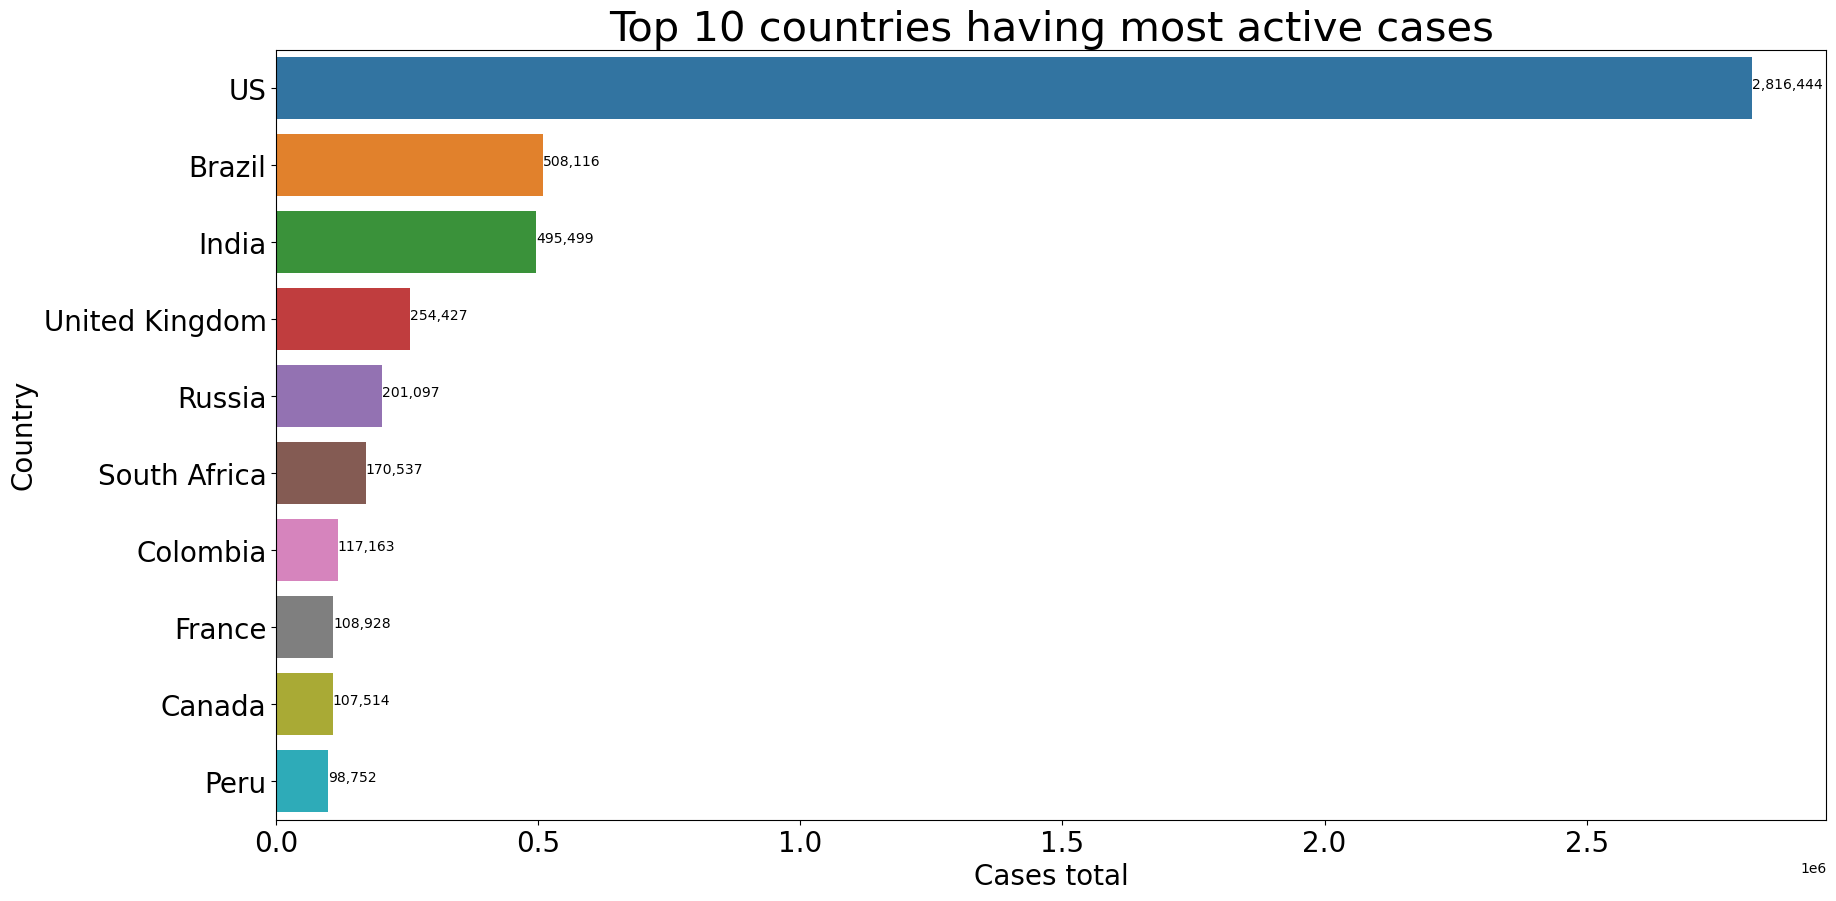

In [29]:
plt.figure(figsize=(20,10))
plt.title('Top 10 countries having most active cases',fontsize=30)
a = sns.barplot(x=actives.Active,y=actives.Country)
for i,(value,name) in enumerate(zip(actives.Active,actives.Country)):
    a.text(value,i-.05,f'{value:,.0f}',size=10,ha='left',va='center')
a.set(xlabel='Cases total',ylabel='Country')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Cases total',fontsize=20)
plt.ylabel('Country',fontsize=20)
plt.savefig("Top_10_Active_Country.png")
plt.show()

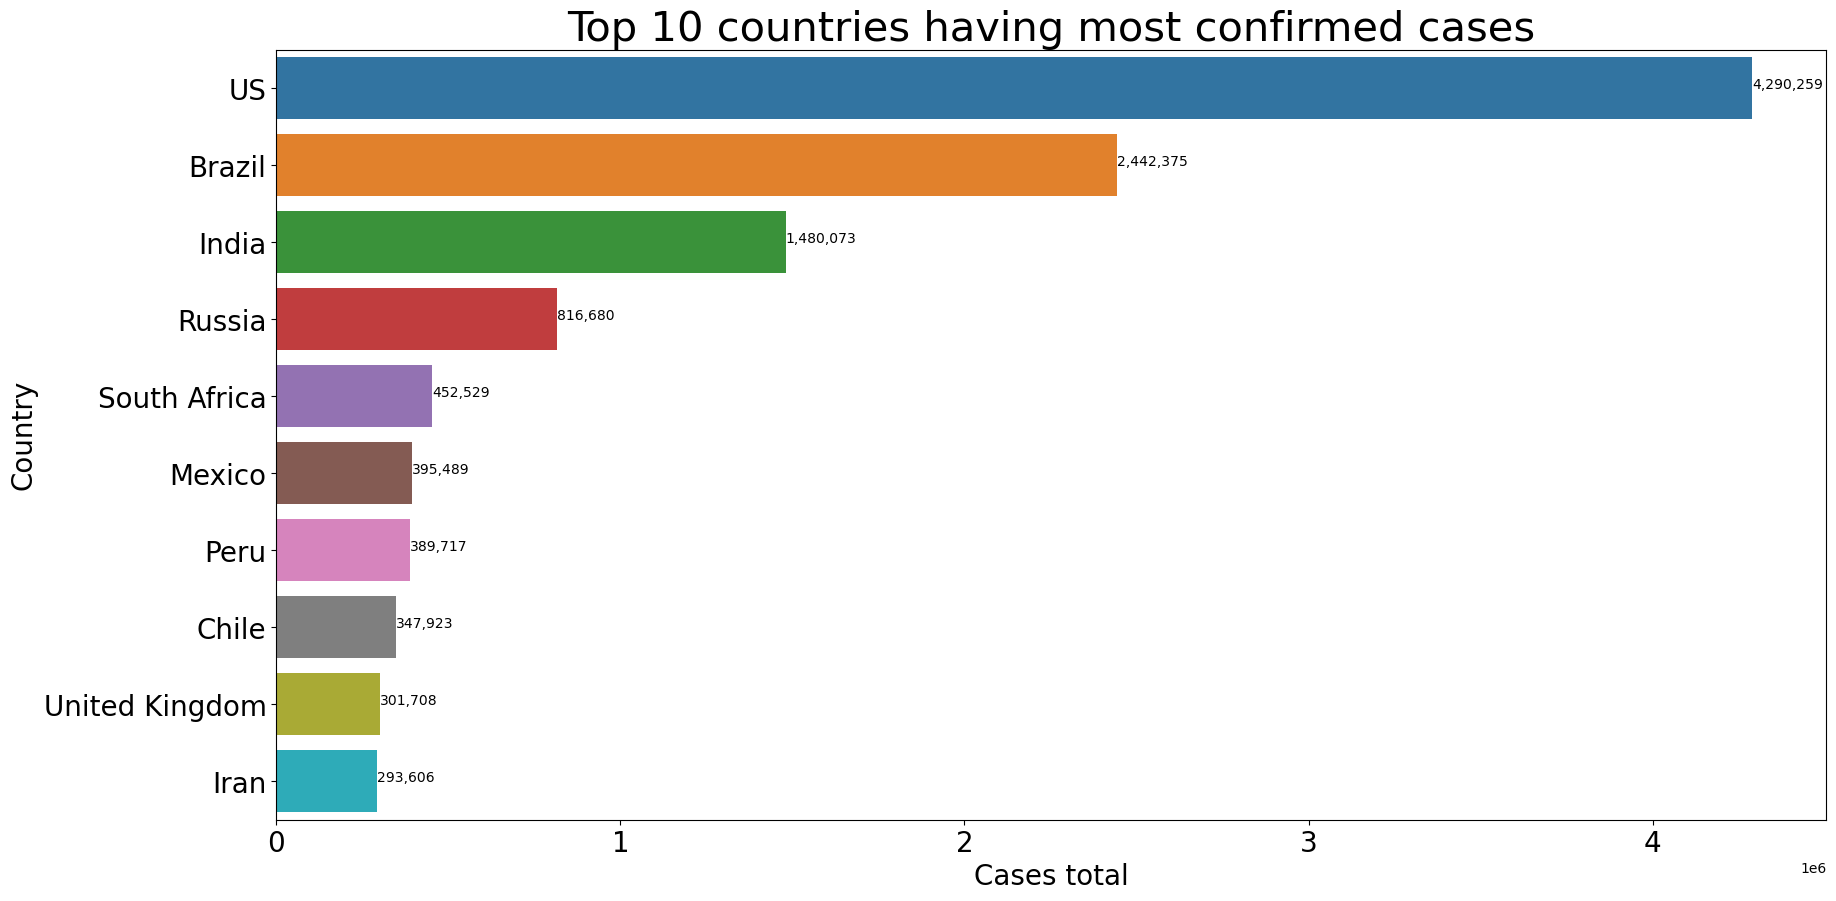

In [30]:
plt.figure(figsize=(20,10))
plt.title('Top 10 countries having most confirmed cases',fontsize=30)
a = sns.barplot(x=confirmed.Confirmed, y=confirmed.Country)
for i,(value,name) in enumerate(zip(confirmed.Confirmed, confirmed.Country)):
    a.text(value,i-.05,f'{value:,.0f}',size=10,ha='left',va='center')
a.set(xlabel='Cases total',ylabel='Country')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Cases total',fontsize=20)
plt.ylabel('Country',fontsize=20)
plt.savefig("Top_10_Confirmed_Country.png")
plt.show()

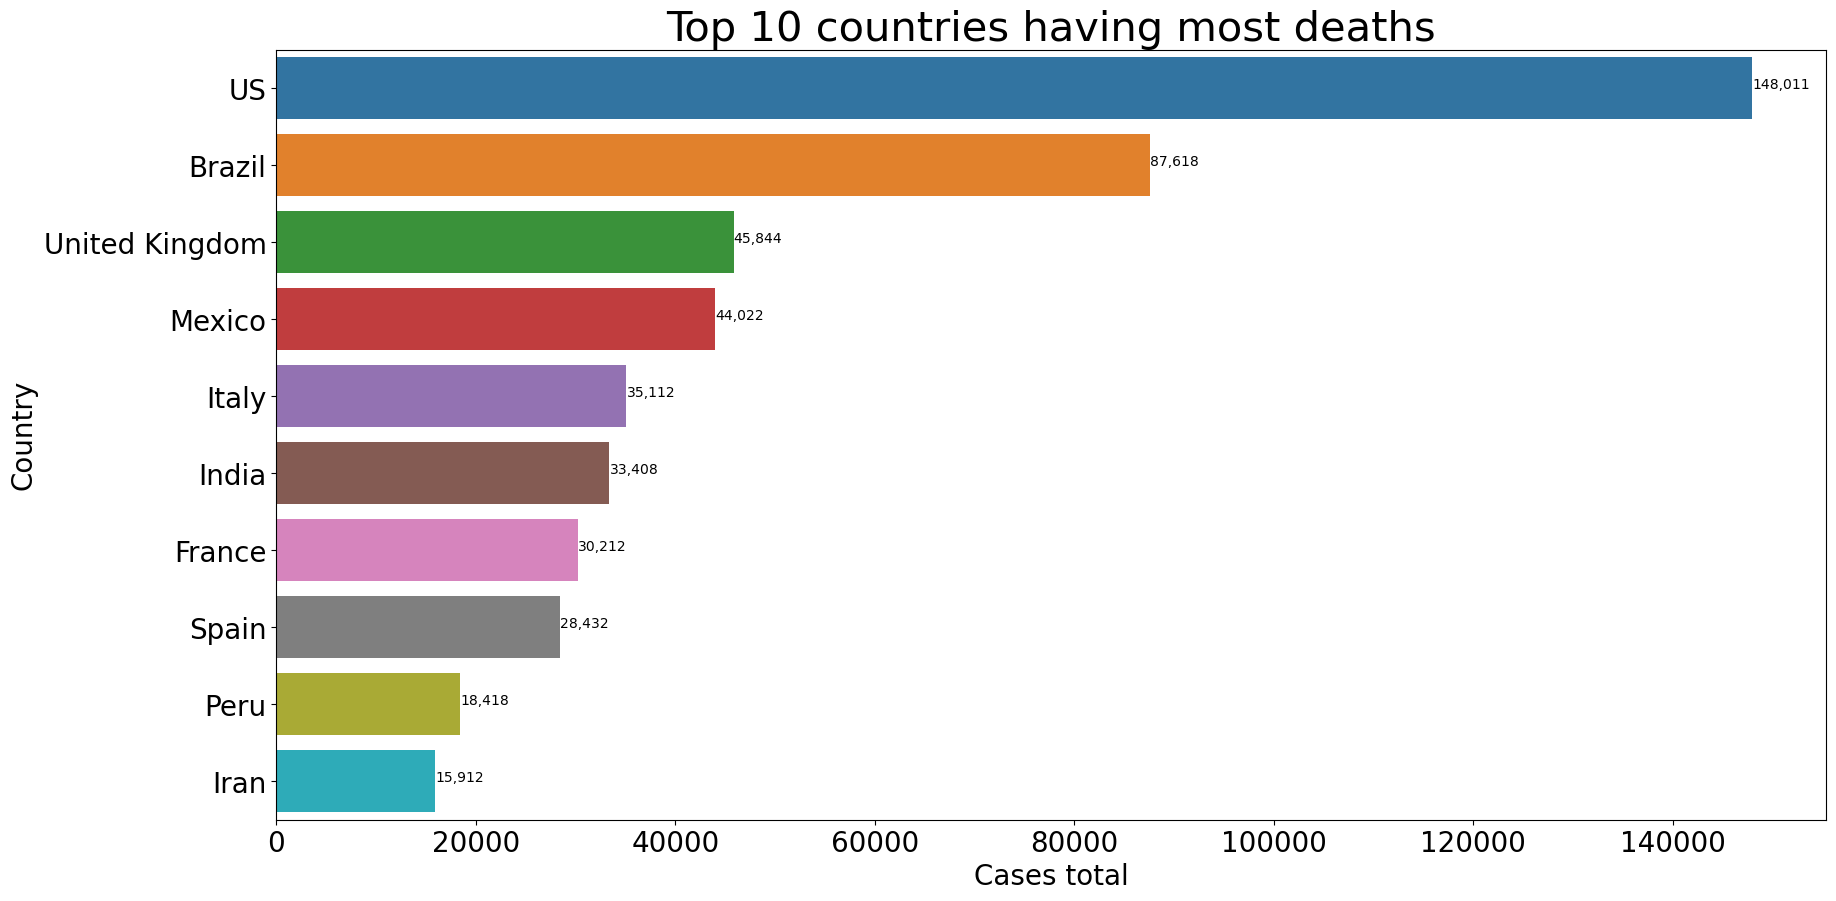

In [31]:
plt.figure(figsize=(20,10))
plt.title('Top 10 countries having most deaths',fontsize=30)
a = sns.barplot(x=deaths.Deaths, y=deaths.Country)
for i,(value,name) in enumerate(zip(deaths.Deaths, deaths.Country)):
    a.text(value,i-.05,f'{value:,.0f}',size=10,ha='left',va='center')
a.set(xlabel='Cases total',ylabel='Country')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Cases total',fontsize=20)
plt.ylabel('Country',fontsize=20)
plt.savefig("Top_10_Deaths_Country.png")
plt.show()

#### Exploring data for the top 4 Countries having highest number of confirmed cases

In [32]:
US = df[df['Country'] == 'US']
US = US.groupby('Date')["Recovered","Deaths","Confirmed","Active"].sum().reset_index()
Brazil = df[df['Country'] == 'Brazil']
Brazil = Brazil.groupby('Date')["Recovered","Deaths","Confirmed","Active"].sum().reset_index()
India = df[df['Country'] == 'India']
India = India.groupby('Date')["Recovered","Deaths","Confirmed","Active"].sum().reset_index()
Russia = df[df['Country'] == 'Russia']
Russia = Russia.groupby('Date')["Recovered","Deaths","Confirmed","Active"].sum().reset_index()

In [33]:
US

Date  Recovered  Deaths  Confirmed   Active
0   2020-01-22          0       0          1        1
1   2020-01-23          0       0          1        1
2   2020-01-24          0       0          2        2
3   2020-01-25          0       0          2        2
4   2020-01-26          0       0          5        5
..         ...        ...     ...        ...      ...
183 2020-07-23    1233269  144430    4038816  2661117
184 2020-07-24    1261624  145560    4112531  2705347
185 2020-07-25    1279414  146465    4178970  2753091
186 2020-07-26    1297863  146935    4233923  2789125
187 2020-07-27    1325804  148011    4290259  2816444

[188 rows x 5 columns]

In [34]:
Brazil

Date  Recovered  Deaths  Confirmed  Active
0   2020-01-22          0       0          0       0
1   2020-01-23          0       0          0       0
2   2020-01-24          0       0          0       0
3   2020-01-25          0       0          0       0
4   2020-01-26          0       0          0       0
..         ...        ...     ...        ...     ...
183 2020-07-23    1620313   84082    2287475  583080
184 2020-07-24    1693214   85238    2343366  564914
185 2020-07-25    1785359   86449    2394513  522705
186 2020-07-26    1812913   87004    2419091  519174
187 2020-07-27    1846641   87618    2442375  508116

[188 rows x 5 columns]

In [35]:
India

Date  Recovered  Deaths  Confirmed  Active
0   2020-01-22          0       0          0       0
1   2020-01-23          0       0          0       0
2   2020-01-24          0       0          0       0
3   2020-01-25          0       0          0       0
4   2020-01-26          0       0          0       0
..         ...        ...     ...        ...     ...
183 2020-07-23     817209   30601    1288108  440298
184 2020-07-24     849432   31358    1337024  456234
185 2020-07-25     885573   32060    1385635  468002
186 2020-07-26     917568   32771    1435616  485277
187 2020-07-27     951166   33408    1480073  495499

[188 rows x 5 columns]

In [36]:
Russia

Date  Recovered  Deaths  Confirmed  Active
0   2020-01-22          0       0          0       0
1   2020-01-23          0       0          0       0
2   2020-01-24          0       0          0       0
3   2020-01-25          0       0          0       0
4   2020-01-26          0       0          0       0
..         ...        ...     ...        ...     ...
183 2020-07-23     579295   12873     793720  201552
184 2020-07-24     587728   13026     799499  198745
185 2020-07-25     596064   13172     805332  196096
186 2020-07-26     599172   13249     811073  198652
187 2020-07-27     602249   13334     816680  201097

[188 rows x 5 columns]

In [37]:
#US = US.iloc[33:,:].reset_index()
#Russia = Russia.iloc[33:,:].reset_index()
#Brazil = Brazil.iloc[33:,:].reset_index()
#India = India.iloc[33:,:].reset_index()

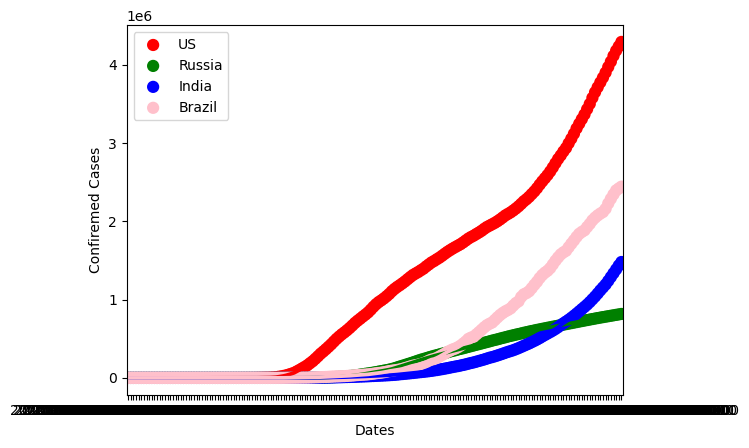

In [38]:
sns.pointplot(y = 'Confirmed', x = 'Date', data = US, color = 'red', label = 'US')
sns.pointplot(y = 'Confirmed', x = 'Date', data = Russia, color = 'green', label = 'Russia')
sns.pointplot(y = 'Confirmed', x = 'Date', data = India, color = 'blue', label ='India')
sns.pointplot(y = 'Confirmed', x = 'Date', data = Brazil, color = 'pink', label = 'Brazil')
plt.legend()
plt.xlabel("Dates")
plt.ylabel("Confiremed Cases")
plt.xticks(rotation = 45)
plt.savefig("compare_Confirmed.png")
plt.show()

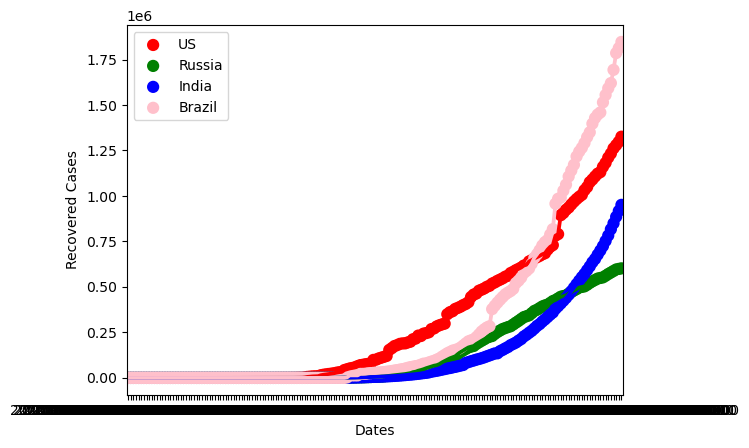

In [39]:
sns.pointplot(y = 'Recovered', x = 'Date', data = US, color = 'red', label = 'US')
sns.pointplot(y = 'Recovered', x = 'Date', data = Russia, color = 'green', label = 'Russia')
sns.pointplot(y = 'Recovered', x = 'Date', data = India, color = 'blue', label ='India')
sns.pointplot(y = 'Recovered', x = 'Date', data = Brazil, color = 'pink', label = 'Brazil')
plt.legend()
plt.xlabel("Dates")
plt.ylabel("Recovered Cases")
plt.savefig("compare_Recovered.png")
plt.show()

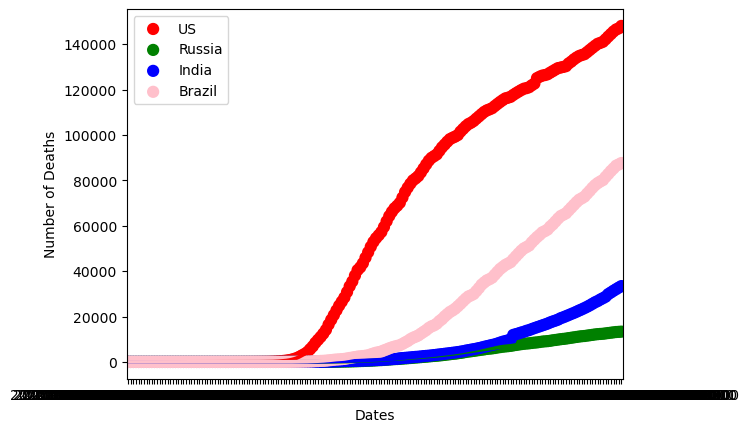

In [40]:
sns.pointplot(y = 'Deaths', x = 'Date', data = US, color = 'red', label = 'US')
sns.pointplot(y = 'Deaths', x = 'Date', data = Russia, color = 'green', label = 'Russia')
sns.pointplot(y = 'Deaths', x = 'Date', data = India, color = 'blue', label ='India')
sns.pointplot(y = 'Deaths', x = 'Date', data = Brazil, color = 'pink', label = 'Brazil')
plt.legend()
plt.xlabel("Dates")
plt.ylabel("Number of Deaths")
plt.savefig("compare_Deaths.png")
plt.show()

In [41]:
from prophet import Prophet

In [42]:
df.head()

State      Country       Lat       Long       Date  Confirmed  Deaths  \
0   NaN  Afghanistan  33.93911  67.709953 2020-01-22          0       0   
1   NaN      Albania  41.15330  20.168300 2020-01-22          0       0   
2   NaN      Algeria  28.03390   1.659600 2020-01-22          0       0   
3   NaN      Andorra  42.50630   1.521800 2020-01-22          0       0   
4   NaN       Angola -11.20270  17.873900 2020-01-22          0       0   

   Recovered  Active             WHO Region  
0          0       0  Eastern Mediterranean  
1          0       0                 Europe  
2          0       0                 Africa  
3          0       0                 Europe  
4          0       0                 Africa

In [43]:
df.groupby("Date").sum().head()

Lat         Long  Confirmed  Deaths  Recovered  Active
Date                                                                     
2020-01-22  5594.20365  6140.869714        555      17         28     510
2020-01-23  5594.20365  6140.869714        654      18         30     606
2020-01-24  5594.20365  6140.869714        941      26         36     879
2020-01-25  5594.20365  6140.869714       1434      42         39    1353
2020-01-26  5594.20365  6140.869714       2118      56         52    2010

In [44]:
confirmed = df.groupby("Date").sum()["Confirmed"].reset_index()
death = df.groupby("Date").sum()["Deaths"].reset_index()
recovered = df.groupby("Date").sum()["Recovered"].reset_index()

# **Forecast on Confirmed Cases**

In [45]:
confirmed.columns = ['ds','y']        # ds columns should be in datetime datatype
confirmed.head()

ds     y
0 2020-01-22   555
1 2020-01-23   654
2 2020-01-24   941
3 2020-01-25  1434
4 2020-01-26  2118

In [46]:
m = Prophet(interval_width = 0.95)
m.fit(confirmed)

23:51:38 - cmdstanpy - INFO - Chain [1] start processing
23:51:38 - cmdstanpy - INFO - Chain [1] done processing


In [47]:
future = m.make_future_dataframe(periods = 7, freq = 'D')
future

ds
0   2020-01-22
1   2020-01-23
2   2020-01-24
3   2020-01-25
4   2020-01-26
..         ...
190 2020-07-30
191 2020-07-31
192 2020-08-01
193 2020-08-02
194 2020-08-03

[195 rows x 1 columns]

In [48]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
190 2020-07-30  1.674820e+07  1.659605e+07  1.691494e+07
191 2020-07-31  1.696362e+07  1.680304e+07  1.712967e+07
192 2020-08-01  1.717143e+07  1.700726e+07  1.733475e+07
193 2020-08-02  1.736922e+07  1.720723e+07  1.753639e+07
194 2020-08-03  1.756410e+07  1.738528e+07  1.777089e+07

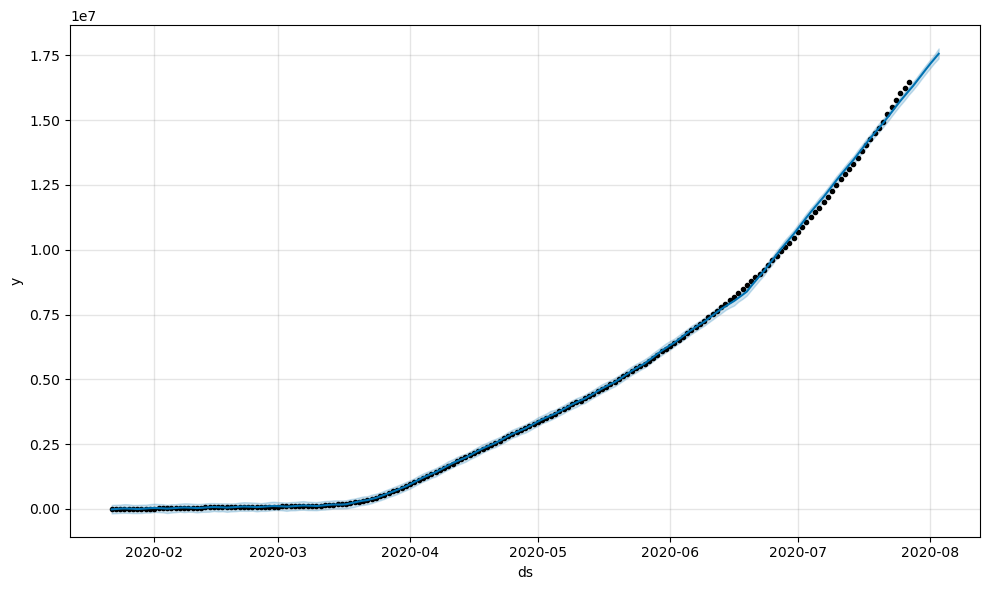

In [49]:
confirmed_forecast_plot = m.plot(forecast)

# **Forecast on Death Cases**

In [50]:
death.columns = ['ds','y']        # ds columns should be in datetime datatype
death.head()

ds   y
0 2020-01-22  17
1 2020-01-23  18
2 2020-01-24  26
3 2020-01-25  42
4 2020-01-26  56

In [51]:
d = Prophet(interval_width = 0.95)
d.fit(death)

23:51:39 - cmdstanpy - INFO - Chain [1] start processing
23:51:39 - cmdstanpy - INFO - Chain [1] done processing


In [52]:
future = d.make_future_dataframe(periods = 7, freq = 'D')
future

ds
0   2020-01-22
1   2020-01-23
2   2020-01-24
3   2020-01-25
4   2020-01-26
..         ...
190 2020-07-30
191 2020-07-31
192 2020-08-01
193 2020-08-02
194 2020-08-03

[195 rows x 1 columns]

In [53]:
forecast = d.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

ds           yhat     yhat_lower     yhat_upper
190 2020-07-30  663521.743356  660334.495597  666815.930343
191 2020-07-31  669038.962960  665746.223566  672651.352064
192 2020-08-01  673922.465056  670189.148533  678007.228435
193 2020-08-02  678060.469456  673457.594100  683071.221208
194 2020-08-03  682351.854619  676719.597885  688147.138935

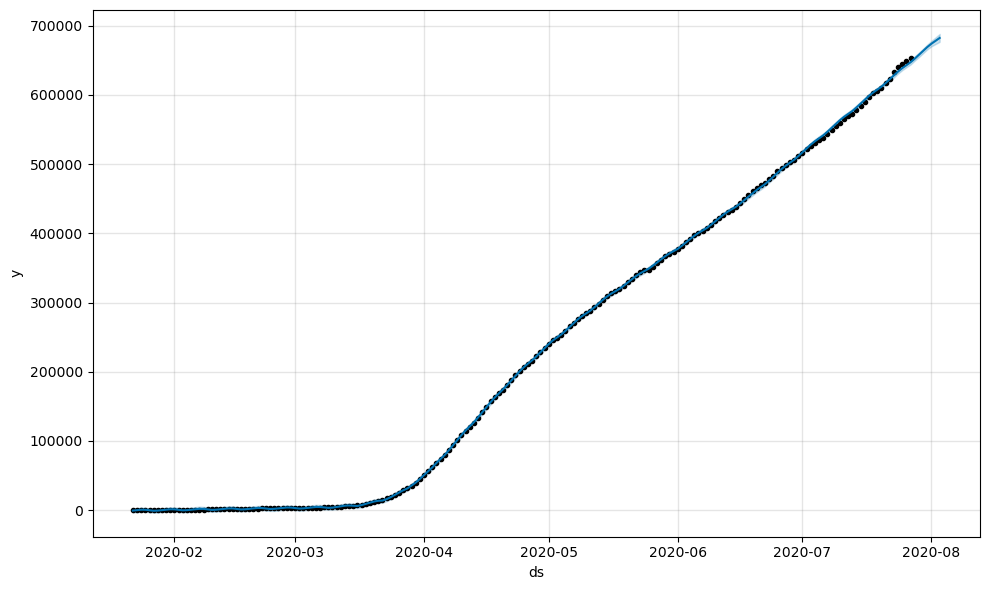

In [54]:
death_forecast_plot = d.plot(forecast)

# **Forecast of Recovered Cases**

In [55]:
recovered.columns = ['ds','y']
recovered.head()

ds   y
0 2020-01-22  28
1 2020-01-23  30
2 2020-01-24  36
3 2020-01-25  39
4 2020-01-26  52

In [56]:
r = Prophet(interval_width = 0.95)
r.fit(recovered)

23:51:40 - cmdstanpy - INFO - Chain [1] start processing
23:51:40 - cmdstanpy - INFO - Chain [1] done processing


In [57]:
future = r.make_future_dataframe(freq = 'D', periods = 7)
future

ds
0   2020-01-22
1   2020-01-23
2   2020-01-24
3   2020-01-25
4   2020-01-26
..         ...
190 2020-07-30
191 2020-07-31
192 2020-08-01
193 2020-08-02
194 2020-08-03

[195 rows x 1 columns]

In [58]:
forecast = r.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
190 2020-07-30  9.598531e+06  9.475262e+06  9.714103e+06
191 2020-07-31  9.740095e+06  9.618338e+06  9.865000e+06
192 2020-08-01  9.880394e+06  9.741585e+06  9.996582e+06
193 2020-08-02  1.000646e+07  9.875529e+06  1.012989e+07
194 2020-08-03  1.014305e+07  1.000797e+07  1.026969e+07

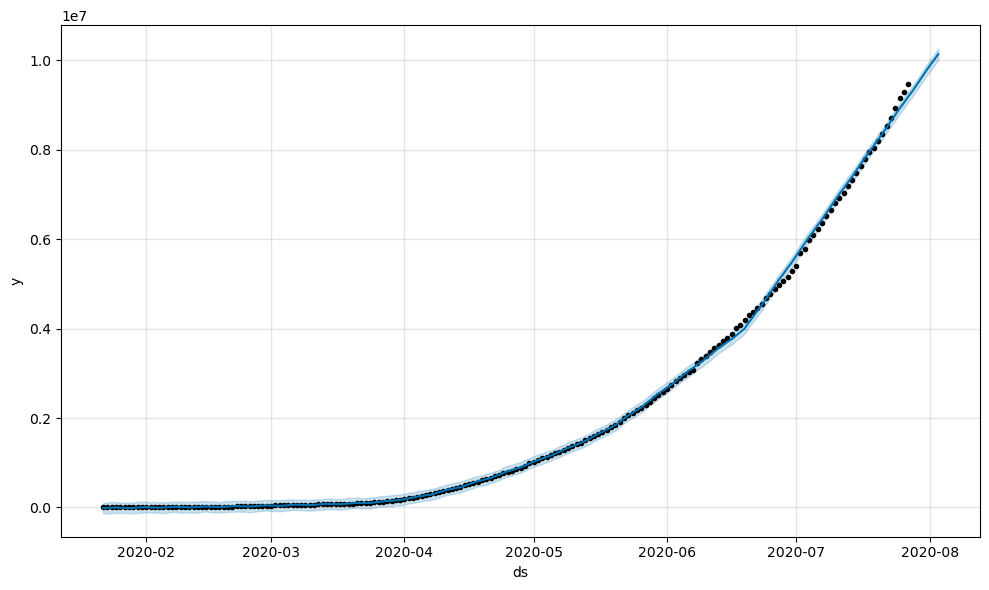

In [59]:
recovered_forecast_plot = r.plot(forecast)